In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_csv('Cannabis_Irrigation.csv')
df

,DateTime,SM_Top_A1
0,2022-02-21 00:00:00,41.3
1,2022-02-21 00:15:00,34.5
2,2022-02-21 00:30:00,32.6
3,2022-02-21 00:45:00,31.7
4,2022-02-21 01:00:00,31.6
...,...,...
5467,2022-04-18 22:45:00,29.0
5468,2022-04-18 23:00:00,29.0
5469,2022-04-18 23:15:00,28.8
5470,2022-04-18 23:30:00,29.0


In [3]:
df.isnull().sum()

DateTime     0
SM_Top_A1    0
dtype: int64

In [4]:
x = df.DateTime.values
x

array(['2022-02-21 00:00:00', '2022-02-21 00:15:00',
       '2022-02-21 00:30:00', ..., '2022-04-18 23:15:00',
       '2022-04-18 23:30:00', '2022-04-18 23:45:00'], dtype=object)

In [5]:
for i in range(len(x)):
    x[i] = float(datetime.strptime(x[i], "%Y-%m-%d %H:%M:%S").timestamp()) - 1645381800.0

In [6]:
x

array([0.0, 900.0, 1800.0, ..., 4922100.0, 4923000.0, 4923900.0],
      dtype=object)

In [7]:
df.shape

(5472, 2)

In [8]:
x = df[['DateTime']]
x

,DateTime
0,0.0
1,900.0
2,1800.0
3,2700.0
4,3600.0
...,...
5467,4920300.0
5468,4921200.0
5469,4922100.0
5470,4923000.0


In [9]:
y = df[['SM_Top_A1']]
y

,SM_Top_A1
0,41.3
1,34.5
2,32.6
3,31.7
4,31.6
...,...
5467,29.0
5468,29.0
5469,28.8
5470,29.0


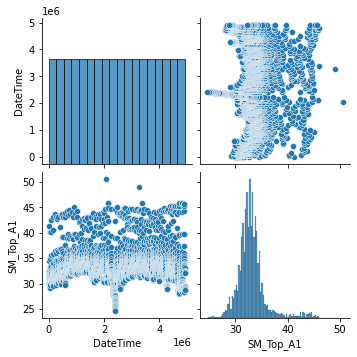

In [10]:
import seaborn as sb
sb.pairplot(df)

In [11]:
from sklearn import preprocessing
labels = preprocessing.LabelEncoder()
x = labels.fit_transform(y)
print(x)

[157  90  71 ...  33  35  33]


C:\Users\dhava\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
x_train= x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
x_train.shape

(4377, 1)

In [16]:
y_train.shape

(4377, 1)

In [17]:
x_test.shape

(1095, 1)

In [18]:
y_test.shape

(1095, 1)

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
decision_tree = DecisionTreeRegressor(random_state=0)
decision_tree.fit(x_train,y_train)
mse = cross_val_score(decision_tree, x_train, y_train, scoring='neg_mean_squared_error', cv=10)
mse

array([-4.56621005e-05, -1.36986301e-04, -1.14155251e-04, -5.84474886e-03,
       -2.28310502e-05, -4.56621005e-04, -2.19634703e-02, -9.15331808e-05,
       -2.28832952e-04, -9.15331808e-05])

In [20]:
tree_pred=decision_tree.predict(x_test)
tree_pred

array([45.6, 32.9, 33.3, ..., 35. , 32.2, 29.6])

In [21]:
from sklearn.metrics import r2_score
score=r2_score(y_test,tree_pred)
score

0.9999911327415814